## **Implementation of MF (Matrix Factorization) from the scratch**

In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Decompose the matrix as follows, **R = B C**

R = Ratings matrix (n*m)

B = Users matrix (n*d)

C = Items matrix (m*d) 

where, n_components= # dimensions (hyper-parameter)




In [0]:
np.random.seed(28)

**Objective/Loss function:** argmin ||R - B.C.T||^2 


B = B - learning_rate*grad(L)/dB

C = C - learning_rate*grad(L)/dC



---


B = B - rate * (B@C@ C.T - R@ C.T)

C = C - rate * (B.T@B@C - B.T@R)



### **Scratch code's implementation of NMF**

In [0]:
class NMF:
    def __init__(self, n_components=2, learning_rate=0.01, max_iter=50):
        self.n_components=n_components
        self.learning_rate=learning_rate
        self.max_iter=max_iter        
        self.cost=[]

    def fit(self, R):
      try:
        B=np.random.rand(R.shape[0],self.n_components)*0.01
        C=np.random.rand(self.n_components, R.shape[1])*0.01        
        for _ in range(self.max_iter):
            grad_B = B@C@C.T - R@C.T
            grad_C = B.T@B@C - B.T@R
            #update B, C
            B = B - self.learning_rate * grad_B
            C = C - self.learning_rate * grad_C            
            self.cost.append(np.abs(R-B@C).sum())        
        self.B=B
        self.C=C
        return self.B, self.C
      except Exception as e:
        print("Exception \"{0}\" occured ",e)

In [0]:
%%time
obj = NMF(n_components=15, learning_rate=0.01, max_iter=300)
#random inititalization of rating matrix
R = np.random.rand(35,40)
B1,C1 = obj.fit(R)


CPU times: user 26 ms, sys: 990 µs, total: 27 ms
Wall time: 27.9 ms


### **sklearn's implementation of NMF**

In [0]:
from sklearn.decomposition import NMF
model = NMF(n_components=15, init='random', random_state=28, max_iter=300, alpha=0.01)
B2 = model.fit_transform(R)
C2 = model.components_

In [0]:
## This is to compare the values of original matrix with decomposed matrix
#display(R)
#display(B2@C2)
#np.absolute(R - B2@C2), "..",  np.absolute(R - B1@C1)

### **Gradient Descent plot- Loss v/s Iterations**

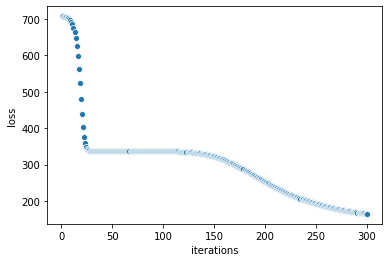

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(range(1,obj.max_iter+1), obj.cost)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

### **Comparing results**

I'm measuring the distance metric as
"The summation of absolute difference between orginal matrix(R) and its factors 
(B.C)"

In [0]:
from prettytable import PrettyTable
pt = PrettyTable(["","GradientDescent' NMF","Sklearn's NMF"])
pt.add_row(["Dist b/w R and B*C", np.abs(R-B2@C2).sum(), np.abs(R-B1@C1).sum()])
pt.add_row(["n_iter", 300, 300])
pt.add_row(["learning_rate", 0.01, 0.01])
print(pt)

+--------------------+---------------------+--------------------+
|                    | GradientDescent NMF |   Sklearn's NMF    |
+--------------------+---------------------+--------------------+
| Dist b/w R and B*C |  158.35862275434027 | 164.41611130406645 |
|       n_iter       |         300         |        300         |
|   learning_rate    |         0.01        |        0.01        |
+--------------------+---------------------+--------------------+
